In [1]:
import pybamm
import os
import numpy as np
import matplotlib.pyplot as plt
os.chdir(pybamm.__path__[0]+'/..')

In [2]:
model = pybamm.lithium_ion.DFN()
chemistry = pybamm.parameter_sets.ORegan2022_adjusted
param = pybamm.ParameterValues(chemistry=chemistry)
param.update({"Ambient temperature [K]": 278.15})
exp = pybamm.Experiment(["Discharge at 2C until 2.5 V"])

pts400 = {
    "x_n": 20,  # negative electrode
    "x_s": 10,  # separator 
    "x_p": 20,  # positive electrode
    "r_n": 400,  # negative particle
    "r_p": 400,  # positive particle
}

sim400 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts400)
solution400 = sim400.solve(calc_esoh=False)

pts200 = {
    "x_n": 20,  # negative electrode
    "x_s": 10,  # separator 
    "x_p": 20,  # positive electrode
    "r_n": 200,  # negative particle
    "r_p": 200,  # positive particle
}

sim200 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts200)
solution200 = sim200.solve(calc_esoh=False)

pts100 = {
    "x_n": 20,  # negative electrode
    "x_s": 10,  # separator 
    "x_p": 20,  # positive electrode
    "r_n": 100,  # negative particle
    "r_p": 100,  # positive particle
}

sim100 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts100)
solution100 = sim100.solve(calc_esoh=False)

pts66 = {
    "x_n": 20,  # negative electrode
    "x_s": 10,  # separator 
    "x_p": 20,  # positive electrode
    "r_n": 66,  # negative particle
    "r_p": 66,  # positive particle
}

sim66 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts66)
solution66 = sim66.solve(calc_esoh=False)

pts50 = {
    "x_n": 20,  # negative electrode
    "x_s": 10,  # separator 
    "x_p": 20,  # positive electrode
    "r_n": 50,  # negative particle
    "r_p": 50,  # positive particle
}

sim50 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts50)
solution50 = sim50.solve(calc_esoh=False)

pts30 = {
    "x_n": 20,  # negative electrode
    "x_s": 10,  # separator 
    "x_p": 20,  # positive electrode
    "r_n": 30,  # negative particle
    "r_p": 30,  # positive particle
}

sim30 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts30)
solution30 = sim30.solve(calc_esoh=False)

pts20 = {
    "x_n": 20,  # negative electrode
    "x_s": 10,  # separator 
    "x_p": 20,  # positive electrode
    "r_n": 20,  # negative particle
    "r_p": 20,  # positive particle
}

sim20 = pybamm.Simulation(model, parameter_values=param, experiment=exp, var_pts=pts20)
solution20 = sim20.solve(calc_esoh=False)

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 0.00286043 and h = 2.88826e-21, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00286043 and h = 4.89171e-24, the corrector convergence failed repeatedly or with |h| = hmin.


In [3]:
t400 = solution400["Time [s]"].entries
print(f"With 400 points, discharge lasts {np.max(t400)} seconds.")
t200 = solution200["Time [s]"].entries
print(f"With 200 points, discharge lasts {np.max(t200)} seconds.")
t100 = solution100["Time [s]"].entries
print(f"With 100 points, discharge lasts {np.max(t100)} seconds.")
t66 = solution66["Time [s]"].entries
print(f"With 66 points, discharge lasts {np.max(t66)} seconds.")
t50 = solution50["Time [s]"].entries
print(f"With 50 points, discharge lasts {np.max(t50)} seconds.")
t30 = solution30["Time [s]"].entries
print(f"With 30 points, discharge lasts {np.max(t30)} seconds.")
t20 = solution20["Time [s]"].entries
print(f"With 20 points, discharge lasts {np.max(t20)} seconds.")

With 400 points, discharge lasts 1102.9853021904255 seconds.
With 200 points, discharge lasts 1101.0654307840607 seconds.
With 100 points, discharge lasts 1085.995927184902 seconds.
With 66 points, discharge lasts 994.8404282487548 seconds.
With 50 points, discharge lasts 812.1657524458358 seconds.
With 30 points, discharge lasts 681.6284950788049 seconds.
With 20 points, discharge lasts 378.7413086841009 seconds.


In [4]:
Q400 = solution400["Discharge capacity [A.h]"].entries
V400 = solution400["Terminal voltage [V]"].entries
Q200 = solution200["Discharge capacity [A.h]"].entries
V200 = solution200["Terminal voltage [V]"].entries
Q100 = solution100["Discharge capacity [A.h]"].entries
V100 = solution100["Terminal voltage [V]"].entries
Q66 = solution66["Discharge capacity [A.h]"].entries
V66 = solution66["Terminal voltage [V]"].entries
Q50 = solution50["Discharge capacity [A.h]"].entries
V50 = solution50["Terminal voltage [V]"].entries
Q30 = solution30["Discharge capacity [A.h]"].entries
V30 = solution30["Terminal voltage [V]"].entries
Q20 = solution20["Discharge capacity [A.h]"].entries
V20 = solution20["Terminal voltage [V]"].entries

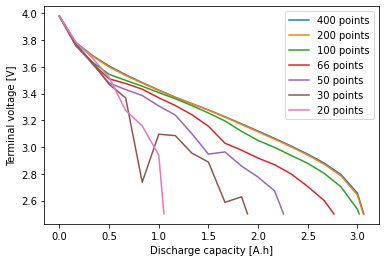

In [5]:
fig, ax = plt.subplots()
ax.plot(Q400,V400,label="400 points")
ax.plot(Q200,V200,label="200 points")
ax.plot(Q100,V100,label="100 points")
ax.plot(Q66,V66,label="66 points")
ax.plot(Q50,V50,label="50 points")
ax.plot(Q30,V30,label="30 points")
ax.plot(Q20,V20,label="20 points")
ax.set_xlabel("Discharge capacity [A.h]")
ax.set_ylabel("Terminal voltage [V]")
ax.legend()
plt.savefig("/mnt/c/Users/sokane/pybamm_data/mesh_refinement/uniform_2C_discharge_278K.pdf")
plt.show()